In [114]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pylab as plt

from datetime import datetime
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [72]:
obs = pd.read_csv('./obesity_clean.csv', index_col = 0)
obs_means = pd.read_csv('./obesity_means.csv', index_col = 0)
obs_years = pd.read_csv('./obesity_years.csv', index_col = 0)

In [109]:
obs.head(3)

,country,year,pct_obese,country_code,sex,latest
0,Afghanistan,2016,4.5,AFG,BTSX,True
1,Afghanistan,2016,2.7,AFG,MLE,True
2,Afghanistan,2016,6.2,AFG,FMLE,True


In [110]:
obs_means.head(3)

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Yemen Arab Republic (until 1990),Zambia,Zimbabwe,mean_yr
0,1975,0.4,5.7,5.9,13.4,0.7,5.1,11.1,6.6,10.5,...,11.8,3.9,4.7,8.3,NaN,NaN,2.5,1.3,3.0,6.074346
1,1976,0.4,5.8,6.1,14.0,0.8,5.3,11.5,6.8,10.7,...,12.1,4.0,4.9,8.6,NaN,NaN,2.6,1.4,3.2,6.270681
2,1977,0.5,6.0,6.2,14.5,0.8,5.4,11.8,7.0,11.0,...,12.4,4.2,5.1,8.8,0.1,NaN,2.7,1.5,3.3,6.467539


In [111]:
obs_years.head(3)

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.4,0.4,0.5,0.5,0.5,0.6,0.6,0.6,0.7,...,2.8,2.9,3.1,3.3,3.5,3.7,3.9,4.1,4.3,4.5
1,Albania,5.7,5.8,6.0,6.1,6.3,6.4,6.6,6.8,7.0,...,16.9,17.5,18.1,18.7,19.3,19.9,20.5,21.1,21.7,22.3
2,Algeria,5.9,6.1,6.2,6.4,6.7,6.9,7.2,7.4,7.8,...,19.2,19.9,20.7,21.4,22.2,23.1,23.9,24.8,25.7,26.6


In [76]:
obs_ts = obs_means.copy()
obs_ts['year'] = pd.to_datetime(obs_ts['year'], format = '%Y')

obs_ts.head(3)

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Yemen Arab Republic (until 1990),Zambia,Zimbabwe,mean_yr
0,1975-01-01,0.4,5.7,5.9,13.4,0.7,5.1,11.1,6.6,10.5,...,11.8,3.9,4.7,8.3,NaN,NaN,2.5,1.3,3.0,6.074346
1,1976-01-01,0.4,5.8,6.1,14.0,0.8,5.3,11.5,6.8,10.7,...,12.1,4.0,4.9,8.6,NaN,NaN,2.6,1.4,3.2,6.270681
2,1977-01-01,0.5,6.0,6.2,14.5,0.8,5.4,11.8,7.0,11.0,...,12.4,4.2,5.1,8.8,0.1,NaN,2.7,1.5,3.3,6.467539


In [77]:
print(obs_ts.dtypes.value_counts().to_string())

float64           196
datetime64[ns]      1


In [78]:
obs_ts.set_index('year', inplace = True)

In [79]:
obs_ts.head(3)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Yemen Arab Republic (until 1990),Zambia,Zimbabwe,mean_yr
year,,,,,,,,,,,,,,,,,,,,,
1975-01-01,0.4,5.7,5.9,13.4,0.7,5.1,11.1,6.6,10.5,7.7,...,11.8,3.9,4.7,8.3,NaN,NaN,2.5,1.3,3.0,6.074346
1976-01-01,0.4,5.8,6.1,14.0,0.8,5.3,11.5,6.8,10.7,7.8,...,12.1,4.0,4.9,8.6,NaN,NaN,2.6,1.4,3.2,6.270681
1977-01-01,0.5,6.0,6.2,14.5,0.8,5.4,11.8,7.0,11.0,8.0,...,12.4,4.2,5.1,8.8,0.1,NaN,2.7,1.5,3.3,6.467539


In [81]:
obs_ts.index

DatetimeIndex(['1975-01-01', '1976-01-01', '1977-01-01', '1978-01-01',
               '1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01',
               '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
               '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

In [126]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 2).mean()
    rolstd = timeseries.rolling(window = 2).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

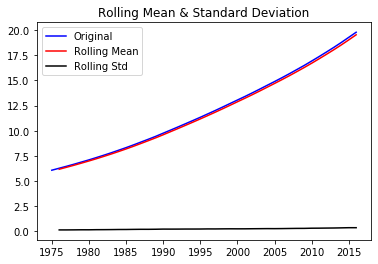

Results of Dickey-Fuller Test:
Test Statistic                  4.005960
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [128]:
test_stationarity(obs_ts['mean_yr'])

In [148]:
dd = np.asarray(train.Count)

y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.savefig('time-series-naive-approach.png')

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print('RMSE with naive approach : ', rms)

AttributeError: 'DataFrame' object has no attribute 'Count'

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()